# Co-plotting hemibrain skeleton with flywire dataset for predicting neurotransmitters of typed hemibrain neurons

### This section contains example of fetching skeleton from hemibrain dataset and co-plotting with a flywire instance

### Import neccesary library modules now

In [1]:
import navis
import fafbseg
import flybrains

In [2]:
from pyroglancer.localserver import startdataserver, closedataserver
from pyroglancer.flywire import flywireurl2dict, add_flywirelayer, set_flywireviewerstate

In [3]:
import navis.interfaces.neuprint as neu
from navis.interfaces.neuprint import NeuronCriteria as NC, SynapseCriteria as SC

In [4]:
import matplotlib.pyplot as plt
#font = {'family': 'serif', 'serif': ['Palatino']}
#font = {'family': 'serif', 'serif': ['Helvetica']}
#plt.rc('font', **font)
#plt.rc('text', usetex=False)

# This makes it so the PDF export works
import matplotlib as mpl
mpl.rcParams['pdf.use14corefonts']=True
mpl.rcParams['font.sans-serif'] = ['Helvetica',
                                   'DejaVu Sans',
                                   'Bitstream Vera Sans',
                                   'Computer Modern Sans Serif',
                                   'Lucida Grande',
                                   'Verdana',
                                   'Geneva',
                                   'Lucid',
                                   'Arial',                                          
                                   'Avant Garde',
                                   'sans-serif']
mpl.rcParams['font.size'] = 11

### Set configurations to fetch from data from neuprint

In [5]:
client = neu.Client('https://neuprint.janelia.org/', dataset='hemibrain:v1.2.1')

In [6]:
client

Client("https://neuprint.janelia.org", "hemibrain:v1.2.1")

### Get some typed neurons and neuropil meshes from neuprint

In [7]:
neurons_df, roi_counts_df = neu.fetch_neurons(NC(status='Traced',type='ER5',regex=True)) #get some ER5 neurons..

In [8]:
er5bodyidList = neurons_df[['bodyId']]

In [9]:
er5bodyidList

,bodyId
0,1200049187
1,1200057627
2,1230712894
3,1230712956
4,1230738118
5,1230738237
6,1230738247
7,1230742431
8,1230742517
9,1230742552


In [10]:
er5_skel = neu.fetch_skeletons(er5bodyidList, heal=1000, max_threads=30)

Fetching:   0%|          | 0/20 [00:00<?, ?it/s]

INFO - 2021-08-11 19:23:12,421 - utils - NumExpr defaulting to 8 threads.
WARNING - 2021-08-11 19:23:13,010 - connectionpool - Connection pool is full, discarding connection: neuprint.janelia.org
WARNING - 2021-08-11 19:23:13,015 - connectionpool - Connection pool is full, discarding connection: neuprint.janelia.org
WARNING - 2021-08-11 19:23:13,032 - connectionpool - Connection pool is full, discarding connection: neuprint.janelia.org
WARNING - 2021-08-11 19:23:13,032 - connectionpool - Connection pool is full, discarding connection: neuprint.janelia.org
WARNING - 2021-08-11 19:23:13,032 - connectionpool - Connection pool is full, discarding connection: neuprint.janelia.org
WARNING - 2021-08-11 19:23:13,046 - connectionpool - Connection pool is full, discarding connection: neuprint.janelia.org
WARNING - 2021-08-11 19:23:13,049 - connectionpool - Connection pool is full, discarding connection: neuprint.janelia.org
WARNING - 2021-08-11 19:23:13,056 - connectionpool - Connection pool is 

In [11]:
#fetch mesh for Right Antenna lobe..
al_R = neu.fetch_roi('AL(R)')

In [12]:
hemibrain_mesh = navis.Volume(flybrains.JRCFIB2018Fraw.mesh)

In [13]:
figwidth_size = 5
figheigth_size = 5

In [14]:
#navis display options for frontal view..
elev = -180
azim = -90
dist = 6

Plot neurons:   0%|          | 0/20 [00:00<?, ?it/s]

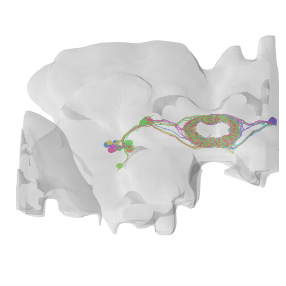

In [15]:
fig = plt.figure(figsize=(figwidth_size, figheigth_size))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
navis.plot2d(er5_skel, method='3d', ax = ax, connectors=False)
navis.plot2d(hemibrain_mesh, method='3d', ax = ax, connectors=False)
# Rotate to frontal view
ax.elev = elev
ax.azim = azim
ax.dist = dist

### Transform them to Flywire space..

In [17]:
flywire_neuron=navis.xform_brain(er5_skel,source='JRCFIB2018Fraw', target='FLYWIRE')

INFO  : Pre-caching deformation field(s) for transforms... (navis)
INFO - 2021-08-11 19:23:40,154 - base - Pre-caching deformation field(s) for transforms...


Transform path: JRCFIB2018Fraw -> JRCFIB2018F -> JRCFIB2018Fum -> JRC2018F -> FAFB14um -> FAFB14 -> FAFB14raw -> FLYWIREraw -> FLYWIRE


Xforming:   0%|          | 0/20 [00:00<?, ?it/s]

In [18]:
flywirevol = {}
flywirevol['hemibrain']=navis.xform_brain(hemibrain_mesh, source='JRCFIB2018Fraw', target='FLYWIRE')
flywirevol['AL_R']=navis.xform_brain(al_R, source='JRCFIB2018Fraw', target='FLYWIRE')

Transform path: JRCFIB2018Fraw -> JRCFIB2018F -> JRCFIB2018Fum -> JRC2018F -> FAFB14um -> FAFB14 -> FAFB14raw -> FLYWIREraw -> FLYWIRE
Transform path: JRCFIB2018Fraw -> JRCFIB2018F -> JRCFIB2018Fum -> JRC2018F -> FAFB14um -> FAFB14 -> FAFB14raw -> FLYWIREraw -> FLYWIRE


In [19]:
flywirevol['hemibrain'].id = 200
flywirevol['AL_R'].id = 300
flywirevol

{'hemibrain': <navis.Volume(name=None, id=200, color=(0.85, 0.85, 0.85, 0.2), vertices.shape=(22125, 3), faces.shape=(44270, 3))>,
 'AL_R': <navis.Volume(name=None, id=300, color=(0.85, 0.85, 0.85, 0.2), vertices.shape=(38829, 3), faces.shape=(77672, 3))>}

### Start the dataserver to host precomputed data..

In [20]:
startdataserver()

Serving data from:  /var/folders/4_/1td4h5lj50z735wckw6pjd5h0000gn/T/tmp_mub8so0
Serving directory at http://127.0.0.1:8000


### Get the url from flywire to append data onto..

In [25]:
shorturl = 'https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/4646812430368768'
#This flywire segments has some stuff similar to the DA1 PNs, you will notice their closeness in the final plot

### Add bodyids to flywire layers..

In [26]:
tmpviewer = add_flywirelayer(flywireurl2dict(shorturl), layer_kws = {'type': 'skeletons',
                                                                     'source': flywire_neuron,
                                                                     'name': 'hemibrain_skels',
                                                                     'color': 'red'}) 
#'alpha': 0.3, doesn't work yet in skeleton layers..

deleting.. /private/var/folders/4_/1td4h5lj50z735wckw6pjd5h0000gn/T/tmp_mub8so0/precomputed/hemibrain_skels
/private/var/folders/4_/1td4h5lj50z735wckw6pjd5h0000gn/T/tmp_mub8so0/precomputed/hemibrain_skels/skeletons/1200057627
/private/var/folders/4_/1td4h5lj50z735wckw6pjd5h0000gn/T/tmp_mub8so0/precomputed/hemibrain_skels/skeletons/1230712894
/private/var/folders/4_/1td4h5lj50z735wckw6pjd5h0000gn/T/tmp_mub8so0/precomputed/hemibrain_skels/skeletons/1230738118
/private/var/folders/4_/1td4h5lj50z735wckw6pjd5h0000gn/T/tmp_mub8so0/precomputed/hemibrain_skels/skeletons/1230742552
/private/var/folders/4_/1td4h5lj50z735wckw6pjd5h0000gn/T/tmp_mub8so0/precomputed/hemibrain_skels/skeletons/1230738247
/private/var/folders/4_/1td4h5lj50z735wckw6pjd5h0000gn/T/tmp_mub8so0/precomputed/hemibrain_skels/skeletons/1230742517
/private/var/folders/4_/1td4h5lj50z735wckw6pjd5h0000gn/T/tmp_mub8so0/precomputed/hemibrain_skels/skeletons/5812979604
/private/var/folders/4_/1td4h5lj50z735wckw6pjd5h0000gn/T/tmp_mub8s

### Add neuropil meshes to flywire layers

In [27]:
shorturl = tmpviewer

In [28]:
tmpviewer = add_flywirelayer(flywireurl2dict(shorturl), layer_kws = {'type': 'volumes',
                                                                     'source': [flywirevol['hemibrain'],
                                                                                flywirevol['AL_R']],
                                                                     'name': 'hemibrain_neuropils',
                                                                     'color': ['grey', 'magenta'], 
                                                                     'alpha': 0.3})

deleting.. /private/var/folders/4_/1td4h5lj50z735wckw6pjd5h0000gn/T/tmp_mub8so0/precomputed/hemibrain_neuropils/mesh
mesh/200
Seg id is: 200
Full filepath: /private/var/folders/4_/1td4h5lj50z735wckw6pjd5h0000gn/T/tmp_mub8so0/precomputed/hemibrain_neuropils/mesh/200
mesh/300
Seg id is: 300
Full filepath: /private/var/folders/4_/1td4h5lj50z735wckw6pjd5h0000gn/T/tmp_mub8so0/precomputed/hemibrain_neuropils/mesh/300
creating: /private/var/folders/4_/1td4h5lj50z735wckw6pjd5h0000gn/T/tmp_mub8so0/precomputed/hemibrain_neuropils/mesh/segment_properties
creating: /private/var/folders/4_/1td4h5lj50z735wckw6pjd5h0000gn/T/tmp_mub8so0/precomputed/hemibrain_neuropils/mesh/segment_names
flywire url at: https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/4849669104467968


In [29]:
tmpviewer,shorturl = set_flywireviewerstate(tmpviewer, axis_lines=False, bounding_box=False)

flywire url at: https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/5975569011310592


127.0.0.1 - - [11/Aug/2021 19:26:04] "GET /precomputed/hemibrain_skels/skeletons//info HTTP/1.1" 200 -
127.0.0.1 - - [11/Aug/2021 19:26:04] "GET /precomputed/hemibrain_neuropils/mesh/info HTTP/1.1" 200 -
127.0.0.1 - - [11/Aug/2021 19:26:04] "GET /precomputed/hemibrain_neuropils/mesh/200:0 HTTP/1.1" 200 -
127.0.0.1 - - [11/Aug/2021 19:26:04] "GET /precomputed/hemibrain_neuropils/mesh/300:0 HTTP/1.1" 200 -
127.0.0.1 - - [11/Aug/2021 19:26:04] "GET /precomputed/hemibrain_skels/skeletons//5812979604 HTTP/1.1" 200 -
127.0.0.1 - - [11/Aug/2021 19:26:04] "GET /precomputed/hemibrain_skels/skeletons//1230712956 HTTP/1.1" 200 -
127.0.0.1 - - [11/Aug/2021 19:26:04] "GET /precomputed/hemibrain_skels/skeletons//1200057627 HTTP/1.1" 200 -
127.0.0.1 - - [11/Aug/2021 19:26:04] "GET /precomputed/hemibrain_skels/skeletons//1230742517 HTTP/1.1" 200 -
127.0.0.1 - - [11/Aug/2021 19:26:04] "GET /precomputed/hemibrain_skels/skeletons//1231066662 HTTP/1.1" 200 -
127.0.0.1 - - [11/Aug/2021 19:26:04] "GET /prec

In [ ]:
#some matches are.. 1231066732 --> 720575940630849069, 5812979604 --> 720575940624108862

In [ ]:
#some of our matching er5 neurons are..
#pre_syn = fafbseg.flywire.fetch_synapses([720575940620940045], transmitters=True, post=False)
#fafbseg.flywire.predict_transmitter([720575940620940045], single_pred=True)

In [30]:
fafbseg.flywire.predict_transmitter([720575940630849069, 720575940624108862])

Querying:   0%|          | 0/2 [00:00<?, ?it/s]

,720575940630849069,720575940624108862
gaba,0.934756,0.841731
acetylcholine,0.029308,0.062223
glutamate,0.010621,0.022981
octopamine,0.000676,0.003360
serotonin,0.003220,0.017663
dopamine,0.021419,0.052042


### Screenshot of the flywire instance

#### you can see the skeletons from hemibrain (red) plotted in the skeleton layer, and some similar neurons (meshes) of the flywire dataset plotted in green and cyan

![alt text](pics/neurotransmitterpred.png "neurotransmitter_prediction")

### Close the dataserver

In [31]:
closedataserver()

Closing server at http://127.0.0.1:8000
Cleaning directory at /private/var/folders/4_/1td4h5lj50z735wckw6pjd5h0000gn/T/tmp_mub8so0
